# <b>Predicting Airfares on New Routes!!!!</b>
## Problem Description:
Several new airports have opened in major cities, opening the market for new routes (a route refers to a pair of airports), and Southwest Airlines has not announced whether it will cover routes to/from these cities. In order to price flights on these routes, a major airline collected information on 638 air routes in the United States. Some factors are known about these new routes: the distance travelled, demographics of the city where the new airport is located, and whether this city is a vacation destination. Other factors are yet unknown (e.g., the number of passengers that will travel this route). A major unknown factor is whether Southwest Airlines or another discount airline will travel on these new routes. Southwest’s strategy (point-to-point routes covering only major cities, use of secondary airports, standardized fleet, low fares) has been very different from the model followed by the older and bigger airlines (hub-and-spoke model extending to even smaller cities, presence in primary airports, variety in fleet, pursuit of high-end business travellers). The presence of discount airlines is therefore believed to reduce the fares greatly. The file <b>Airfares.xlsx</b> contains real data for existing routes that were collected by a major airlines


In [49]:
#Importing all the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [50]:
#reading the file
df = pd.read_excel('Airfares1.xlsx', sheet_name='data')
#Making a copy of the dataframe
df_copy = df.copy()

In [51]:
#Check the type of the read object
print(type(df))
print(type(df_copy))


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [52]:
#Check the head of the dataframe to get some idea about how the data looks like:
df.head()

,S_CODE,S_CITY,E_CODE,E_CITY,COUPON,NEW,VACATION,SW,HI,S_INCOME,E_INCOME,S_POP,E_POP,SLOT,GATE,DISTANCE,PAX,FARE
0,*,Dallas/Fort Worth TX,*,Amarillo TX,1.00,3,No,Yes,5291.991341,28637,21112,3036732,205711,Free,Free,312,7864,64.11
1,*,Atlanta GA,*,Baltimore/Wash Intl MD,1.06,3,No,No,5419.160907,26993,29838,3532657,7145897,Free,Free,576,8820,174.47
2,*,Boston MA,*,Baltimore/Wash Intl MD,1.06,3,No,No,9185.283234,30124,29838,5787293,7145897,Free,Free,364,6452,207.76
3,ORD,Chicago IL,*,Baltimore/Wash Intl MD,1.06,3,No,Yes,2657.351987,29260,29838,7830332,7145897,Controlled,Free,612,25144,85.47
4,MDW,Chicago IL,*,Baltimore/Wash Intl MD,1.06,3,No,Yes,2657.351987,29260,29838,7830332,7145897,Free,Free,612,25144,85.47


In [53]:
#Check the column names of the dataframe
print(df.columns)

Index(['S_CODE', 'S_CITY', 'E_CODE', 'E_CITY', 'COUPON', 'NEW', 'VACATION',
       'SW', 'HI', 'S_INCOME', 'E_INCOME', 'S_POP', 'E_POP', 'SLOT', 'GATE',
       'DISTANCE', 'PAX', 'FARE'],
      dtype='object')


Inorder to understand the data better, we will check what the variables are and what kind of data exists in the dataset

<b>S_CODE</b> =  Starting airport’s code  
<b>S_CITY</b> = Starting city  
<b>E_CODE</b> = Ending airport’s code   
<b>E_CITY</b> = Ending city  
<b>COUPON</b> = Average number of coupons (a one-coupon flight is a non-stop flight, A two-coupon flight is a one stop flight, etc.) for that route  
<b>NEW</b> = Number of new carriers entering that route  
<b>VACATION</b> = Whether a vacation route (Yes) or not (No)  
<b>SW</b> = Whether Southwest Airlines serves that route (Yes) or not (No)  
<b>HI</b> = Herfindel Index - measure of market concentration  
<b>S_INCOME</b> = Starting city’s average personal income  
<b>E_INCOME</b> = Ending city’s average personal income  
<b>S_POP</b> = Starting city’s population  
<b>E_POP</b> = Ending city’s population  
<b>SLOT</b> = Whether either endpoint airport is slot controlled or not; This is a measure of congestion  
<b>GATE</b> = Whether either endpoint airport has gate constraints or not; This is another measure of airport congestion  
<b>DISTANCE</b> =  Distance between two endpoint airports in miles  
<b>PAX</b> = Number of passengers on that route during period of data collection  
<b>FARE</b> = (the response) Average fare on that route  

In [54]:
#Understand the type of data that variable contains
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638 entries, 0 to 637
Data columns (total 18 columns):
S_CODE      638 non-null object
S_CITY      638 non-null object
E_CODE      638 non-null object
E_CITY      638 non-null object
COUPON      638 non-null float64
NEW         638 non-null int64
VACATION    638 non-null object
SW          638 non-null object
HI          638 non-null float64
S_INCOME    638 non-null int64
E_INCOME    638 non-null int64
S_POP       638 non-null int64
E_POP       638 non-null int64
SLOT        638 non-null object
GATE        638 non-null object
DISTANCE    638 non-null int64
PAX         638 non-null int64
FARE        638 non-null float64
dtypes: float64(3), int64(7), object(8)
memory usage: 89.8+ KB


### Interesting!!: There are 8 categorical variables, and 7 integer variables and 3 variables with decimal values

In [55]:
#Check the shape of the data - Rows and column inspection can give better understanding about the structure of the data
df.shape

(638, 18)

It is quite tempting to build model building and prediction, However, the most important part any data scientists should do is <b> EXPLORATION AND VISUALIZATION </b>. Exploratory data analysis is the most crucial step in a machine learning project, as it is very unlikely to unearth unexpected findings, correlations and relationship within the predictor variables as well as with target variables. Actually, Exploratory Data Analysis opens a gateway for efficient feature engineering by helping us to better understand the underlying association.

In [56]:
#Generating 5-number summary could be much helpful and one of the most significant step in exploring the data
df.describe()

,COUPON,NEW,HI,S_INCOME,E_INCOME,S_POP,E_POP,DISTANCE,PAX,FARE
count,638.000000,638.000000,638.000000,638.000000,638.000000,6.380000e+02,6.380000e+02,638.000000,638.000000,638.000000
mean,1.202335,2.753918,4442.141218,27759.860502,27663.727273,4.557004e+06,3.194503e+06,975.653605,12782.214734,160.876677
std,0.203821,0.760448,1724.266962,3596.207837,4611.325018,3.010985e+06,2.735604e+06,646.242403,13202.228860,76.022436
min,1.000000,0.000000,1230.483840,14600.000000,14600.000000,2.983800e+04,1.117450e+05,114.000000,1504.000000,42.470000
25%,1.040000,3.000000,3090.136621,24706.000000,23903.000000,1.862106e+06,1.228816e+06,455.000000,5328.500000,106.290000
50%,1.150000,3.000000,4208.183286,28637.000000,26409.000000,3.532657e+06,2.195215e+06,850.000000,7792.000000,144.600000
75%,1.297500,3.000000,5480.572518,29693.500000,31981.000000,7.830332e+06,4.549784e+06,1306.250000,14090.500000,209.350000
max,1.940000,3.000000,10000.000000,38813.000000,38813.000000,9.056076e+06,9.056076e+06,2764.000000,73892.000000,402.020000


In [57]:
#Starting city flights summary
df["S_CITY"].value_counts()

Chicago             IL    90
New York/Newark     NY    88
Atlanta             GA    41
Dallas/Fort Worth   TX    36
Los Angeles         CA    33
Boston              MA    31
Las Vegas           NV    26
Denver              CO    22
Detroit             MI    22
Houston             TX    20
Phoenix             AZ    15
Orlando             FL    15
Seattle/Tacoma      WA    12
Minneapolis/St Paul MN    12
Fort Lauderdale     FL    11
Miami               FL    11
Kansas City         MO    11
Cleveland           OH    10
Austin              TX    10
Columbus            OH    10
Albuquerque         NM     9
San Diego           CA     9
San Francisco       CA     8
New Orleans         LA     7
Burbank             CA     7
Oakland             CA     6
Washington          DC     6
Cincinnati          OH     6
Philadelphia/Camden PA     6
Hartford            CT     5
Fort Meyers         FL     4
St Louis            MO     4
Tampa               FL     4
Norfolk/Va B/Pt/Ch  VA     3
Memphis       

### Chicago - New York - Atlanta - Dallas - LA
Chicago (90) has the highest number of starting flights followed by New york(88), Atlanta(41), Dallas(36), LA(33) as the starting point  

In [58]:
#End City flights summary
df["E_CITY"].value_counts()

New York/Newark     NY    75
Washington          DC    54
Phoenix             AZ    25
Orlando             FL    23
Baltimore/Wash Intl MD    23
San Francisco       CA    21
Portland            OR    19
Tampa               FL    18
Seattle/Tacoma      WA    18
St Louis            MO    17
San Diego           CA    17
Salt Lake City      UT    15
Las Vegas           NV    15
Philadelphia/Camden PA    14
Indianapolis        IN    14
San Jose            CA    12
Los Angeles         CA    12
Raleigh/Durham      NC    11
West Palm Beach     FL    11
Houston             TX    10
San Antonio         TX    10
Nashville           TN    10
Reno                NV    10
Colorado Springs    CO    10
Pittsburgh          PA    10
Minneapolis/St Paul MN    10
Kansas City         MO     9
Charlotte           NC     8
Chicago             IL     8
Miami               FL     7
                          ..
Fort Meyers         FL     4
Honolulu (Intl)     HI     4
Columbus            OH     4
Louisville    

### New York - Washington - Pheonix - Baltimore - Orlando
New york (75) has the highest number of flights as end point or destination which is followed by Washington (54), Pheonix(25), Baltimore (23), Orlando(23)

## Exploration of Feature variables

One next thing to do is explore how the feature variables are distributed. This plays vital role in engineering features or transform features by finding the skewness with data or factoring variables that is more correlation

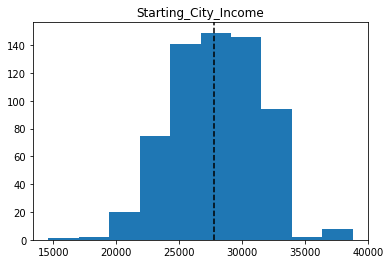

In [59]:
#Plot Boxplots on 4 most important numerical variable S_INCOME,E_INCOME, S_POP, E_POP
#Boxplot for S_INCOME
#plt.boxplot(df["S_INCOME"])
plt.hist(df["S_INCOME"])
plt.title("Starting_City_Income")
plt.axvline(df["S_INCOME"].mean(), color='k', linestyle='dashed', linewidth=1.5)
plt.show()

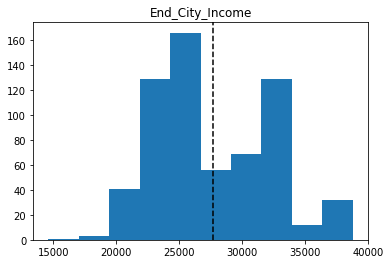

In [60]:
#Boxplot for E_INCOME
#plt.boxplot(df["E_INCOME"])
plt.hist(df["E_INCOME"])
plt.title("End_City_Income")
plt.axvline(df["E_INCOME"].mean(), color='k', linestyle='dashed', linewidth=1.5)
plt.show()

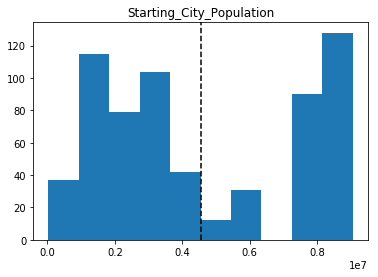

In [61]:
#Boxplot for S_POP
#plt.boxplot(df["S_POP"])
plt.hist(df["S_POP"])
plt.title("Starting_City_Population")
plt.axvline(df["S_POP"].mean(), color='k', linestyle='dashed', linewidth=1.5)
plt.show()

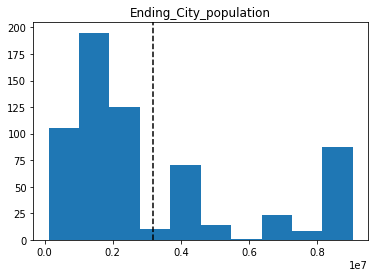

In [62]:
#Histogram for E_POP
plt.hist(df["E_POP"])
plt.title("Ending_City_population")
plt.axvline(df["E_POP"].mean(), color='k', linestyle='dashed', linewidth=1.5)
plt.show()

Points to remember and note from the above visualization:
* Starting and Ending City Population has skewness and skewness affects the accuracy of an algorithm to greater extend. Hence, we would like to address the issue by transforming the features. However, we would like to see how Model is performing before transformation inorder to better assess the capabilities of different models, thereby efficiently tuning the algorithm


In [63]:
#Obtaining the labels
y = df_copy["FARE"]
# We will keep the df and will work on df_copy which is same as df
X = df_copy.drop(["S_CODE","S_CITY","E_CODE","E_CITY","VACATION","SW","SLOT","GATE"], axis = 1)
#Drop the FARE column to make the training dataset without labels
X = X.drop("FARE", axis = 1)

In [64]:
print(X.head())

   COUPON  NEW           HI  S_INCOME  E_INCOME    S_POP    E_POP  DISTANCE  \
0    1.00    3  5291.991341     28637     21112  3036732   205711       312   
1    1.06    3  5419.160907     26993     29838  3532657  7145897       576   
2    1.06    3  9185.283234     30124     29838  5787293  7145897       364   
3    1.06    3  2657.351987     29260     29838  7830332  7145897       612   
4    1.06    3  2657.351987     29260     29838  7830332  7145897       612   

     PAX  
0   7864  
1   8820  
2   6452  
3  25144  
4  25144  


In [65]:
print(y.head())

0     64.11
1    174.47
2    207.76
3     85.47
4     85.47
Name: FARE, dtype: float64


In [66]:
print(X.shape)

(638, 9)


In [67]:
print(y.shape)

(638,)


In [68]:
#Now we will split the dataset randomly in 70-30 train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [69]:
#Validating X_train shape
print("X_train_Shape: ",X_train.shape)
#Validating X_test shape
print("X_test_Shape: ",X_test.shape)
#Validating y_train shape
print("y_train_Shape: ",y_train.shape)
#Validating y_test shape
print("y_test_Shape: ",y_test.shape)

X_train_Shape:  (510, 9)
X_test_Shape:  (128, 9)
y_train_Shape:  (510,)
y_test_Shape:  (128,)


### does splitting the data into train and test set does really matter ?

The answer is YES!!!!. It is possible to train a model without splitting. But the resultant model will have OVERFITTING problem. Overfitting problem is the inability of the model to generalize to new unseen data. Training on Unsplit model will result in high variance model which will give high accuracy during training phase and will lag in generalizing it to the new data and if the problem occurs in production ready model, its a curse to the company which implements in the production phase

# Prediction!!

In [70]:
#Train a LM model
model = LinearRegression()

In [71]:
result = model.fit(X_train, y_train)

In [72]:
print(model.intercept_, model.coef_)
print("Train Score: ",model.score(X_train, y_train))
print("Train Score: ",model.score(X_test, y_test))

-240.5622978188199 [ 3.53032377e+01  2.16228113e-01  1.27754380e-02  4.16332519e-03
  2.58921682e-03  7.24171122e-06  9.62449902e-06  6.82410238e-02
 -1.23806672e-03]
Train Score:  0.6909150886801911
Train Score:  0.7123570021230419


## Model Summary


We ran the model and stored the model results in result variable. However, we can see the intercept and the corresponding coefficient values for all the features that was taken into consideration.However, to make things more informative to the nerds, we will run the model using <b>STATSMODELS</b> library. One variation in OLS (Ordinary least squares) can be done is that we can add constant, so that model is not forced to go through the origin and can have a y-intercept

In [73]:
#Note Unlike sklearn, statsmodel doesn't add a constant automatically, however we will try not adding constant
model1 = sm.OLS(y_train,X_train).fit()
#model summary
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   FARE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     815.4
Date:                Wed, 28 Nov 2018   Prob (F-statistic):          1.08e-292
Time:                        22:13:47   Log-Likelihood:                -2665.2
No. Observations:                 510   AIC:                             5348.
Df Residuals:                     501   BIC:                             5387.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
COUPON       -54.7870     12.133     -4.515      0.000     -78.625     -30.949
NEW           -3.9995      2.737     -1.461      0.145      -9.378       1.379
HI             0.0098      0.001      7.359      0.000       0.007       0.012
S_INCOME       0.0013      0.001      2.287      0.023       0.000       0.002
E_INCOME       0.0010      0.000      2.191      0.029       0.000       0.002
S_POP       7.668e-06   8.51e-07      9.007      0.000       6e-06    9.34e-06
E_POP       1.013e-05   9.28e-07     10.913      0.000    8.31e-06     1.2e-05
DISTANCE       0.0869      0.004     20.205      0.000       0.078       0.095
PAX           -0.0016      0.000     -7.837      0.000      -0.002      -0.001
==============================================================================
Omnibus:                        5.709   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.058   Jarque-Bera (JB):                4.579
Skew:                           0.133   Prob(JB):                        0.101
Kurtosis:                       2.620   Cond. No.                     3.65e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.65e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the Above statistics, some points to note are <b>R-squared</b> and <b>Adjusted R-square</b> metrics. <b>R squared</b> can also be termed as coefficient of determination , which provides a measure of how well our model as a whole explains the feature variable used. It is nothing but the error or evaluation metric against the prediction and the ground truth table.

However, Adjusted R squared is a penalized value of r-square, which penalizes any models for having many dependant variables.

###Other important stats to note:
* <b>P-value</b> all the 9 independant variable are statistically significant with p-values less than 0.05 (typical significant values)
* <b>Skewness</b> is measured as 0.133 and it represents a negligible amount of negative skewness in the data
* <b>Prob(Omnibus)</b> is pretty average, which determines that our data is not very normally distributed. Frankly, we can expect all the real data to be non-normally distributed

A model with around 93% accuracy built on a real data is not a bad model. But, there are mot of avenues to improve which can be obtained by further analysis, feature engineering and extensive data transaformation. <b>Let's Dive Deep!!!</b> 

The above model only assumes that there is only linear relationship between the variables under study. However, some variable seems to provide non-linear (Polynomial Regression) among the dependant variable and the predictor variables. 

In [74]:
#Check the shape of X
X.shape

(638, 9)

In [75]:
#Creating non-linear variables to capture non-linear relationships between the variables
X["S_POP2"] = np.sqrt(X["S_POP"])
X["E_POP2"] = np.sqrt(X["E_POP"])
X["S_INCOME2"] = np.sqrt(X["S_INCOME"])
X["E_INCOME2"] = np.sqrt(X["E_INCOME"])

print(X.head())

   COUPON  NEW           HI  S_INCOME  E_INCOME    S_POP    E_POP  DISTANCE  \
0    1.00    3  5291.991341     28637     21112  3036732   205711       312   
1    1.06    3  5419.160907     26993     29838  3532657  7145897       576   
2    1.06    3  9185.283234     30124     29838  5787293  7145897       364   
3    1.06    3  2657.351987     29260     29838  7830332  7145897       612   
4    1.06    3  2657.351987     29260     29838  7830332  7145897       612   

     PAX       S_POP2       E_POP2   S_INCOME2   E_INCOME2  
0   7864  1742.622162   453.553745  169.224703  145.299690  
1   8820  1879.536379  2673.181064  164.295466  172.736794  
2   6452  2405.679322  2673.181064  173.562669  172.736794  
3  25144  2798.273039  2673.181064  171.055547  172.736794  
4  25144  2798.273039  2673.181064  171.055547  172.736794  


In [77]:
#Notice the change in shape due to addition of columns
print(X.shape)

(638, 13)


In [78]:
#Splitting the data again with same seed as we have added new polynomial features to check for non-linear relationship
X_train1, X_test1, y_train1, y_test1 = train_test_split(X,y,test_size = 0.2, random_state = 42)
#Building the new model
model2 = sm.OLS(y_train1,X_train1).fit()
#Check Model summary
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   FARE   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     652.9
Date:                Wed, 28 Nov 2018   Prob (F-statistic):          1.61e-302
Time:                        22:14:32   Log-Likelihood:                -2628.4
No. Observations:                 510   AIC:                             5283.
Df Residuals:                     497   BIC:                             5338.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
COUPON        38.5820     15.777      2.446      0.015       7.585      69.579
NEW           -0.4115      2.618     -0.157      0.875      -5.555       4.732
HI             0.0119      0.001      9.003      0.000       0.009       0.015
S_INCOME       0.0069      0.008      0.918      0.359      -0.008       0.022
E_INCOME       0.0100      0.007      1.375      0.170      -0.004       0.024
S_POP      -6.663e-08   3.93e-06     -0.017      0.986   -7.79e-06    7.65e-06
E_POP       2.043e-06   3.68e-06      0.555      0.579   -5.19e-06    9.28e-06
DISTANCE       0.0663      0.005     14.211      0.000       0.057       0.075
PAX           -0.0013      0.000     -6.598      0.000      -0.002      -0.001
S_POP2         0.0294      0.016      1.883      0.060      -0.001       0.060
E_POP2         0.0298      0.014      2.175      0.030       0.003       0.057
S_INCOME2     -0.9239      2.512     -0.368      0.713      -5.860       4.012
E_INCOME2     -2.5001      2.457     -1.018      0.309      -7.327       2.326
==============================================================================
Omnibus:                        1.536   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.464   Jarque-Bera (JB):                1.433
Skew:                           0.009   Prob(JB):                        0.488
Kurtosis:                       2.741   Cond. No.                     5.09e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.09e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Hurrah!!!!! 
A linear model which represents and learns 95% variance of the dependant variables is a very good model. Hopefully, if we try to retune the model we might end up with a high variance problem aka Overfitting the model to the data.However, we will try to check whether the model is capable of generalizing to new unseen examples. Let's do it!!!!!

In [92]:
#Making predictions using the latest model with 95% accuracy on the latest split and also with the old model
#New Model Prediction with added Polynomial Features
PredictionNew = model2.predict(X_test1)
print(PredictionNew[0:5])
print(y_test1[0:5])
#Old Model with no newly added features
PredictionOld = model1.predict(X_test)
print(PredictionOld[0:5],y_test[0:5])
print(y_test[0:5])

260    142.238314
228     98.002604
31     124.231976
583     72.266047
600    280.285268
dtype: float64
260    144.60
228    116.78
31     118.95
583    100.95
600    303.82
Name: FARE, dtype: float64
260    150.294067
228     75.600416
31     127.370784
583     89.073450
600    299.293031
dtype: float64 260    144.60
228    116.78
31     118.95
583    100.95
600    303.82
Name: FARE, dtype: float64
260    144.60
228    116.78
31     118.95
583    100.95
600    303.82
Name: FARE, dtype: float64


In [91]:
#Evaluation of the model using test set data using r2_score and mean_squared_error
print("Mean squared error_New: %.2f"% mean_squared_error(y_test1, PredictionNew))
print("Variance_New: %.2f"% r2_score(y_test1, PredictionNew))
print("Mean squared error_Old: %.2f"% mean_squared_error(y_test, PredictionOld))
print("Variance_Old: %.2f"% r2_score(y_test1, PredictionOld))

Mean squared error_New: 1577.96
Variance_New: 0.73
Mean squared error_Old: 1871.29
Variance_Old: 0.68


That's a pretty good prediction and the latest model <b>outperforms the previous model by 5%</b>

<b> OVERFITTING </b>

In everyday life of a Data Scientist, Overfitting and underfitting problems can occur in almost any type of data they deal with because of the fact models like humans can overlearn or have bias. However, we can always adjust the model to have a tradeoff between Variance and Bias

Most common approaches to address overfitting problem are  
1) <b><i>Normalizing the data (Scaling)</i></b>  
2) <b><i>Using Regularizing Parameter in the cost function</i></b>  
3) <b><i>Using a model which is less prone to overfit</i></b>  

# LIFE SAVIOR!!!! ## RANDOM FORESTS AND ENSEMBLE MODELS!!!

In general, ensemble methods reduces the prediction variance to almost nothing, improving the accuracy of the ensemble. Random forest is nothing but number of Decision Trees stacked together wich can be used for both Prediction and Classification task. In prediction, Random forest takes the average of all the values predicted by the decision trees, whereas, in Classification, All decision trees are requied to vote and finally the class is selected out of the list. 

### Scaling the data!!!

Scaling the data is very necessary here, as we can see two critical issues pulling the algorithm performance down. First, some of the dependant variables are <b>not normally distributed and Left skewed (Negative Skewness)</b>. Secondly, the dependant variables are on a different scale. e.g) End city average income <b>E_INCOME</b> is on a scale of thousands and Starting city population <b> S_POP </b> is on a scale of millions and lakhs. Hence, Normalization is a great tool every data scientist must have in their tool box, which comes handy in crisis  

In [93]:
#Calling Scaler function from preprocessing and assigning it to the variable
scaler = StandardScaler()
scaler.fit(X_train1)
X_train = scaler.transform(X_train1)
X_test = scaler.transform(X_test1)

In [95]:
#RF Model
modelrandom = RandomForestRegressor(n_jobs = -1)

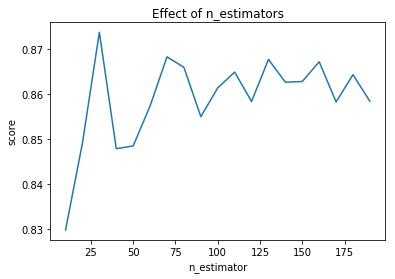

In [97]:
#Trying out different number of estimators (Trial and error is a must in ML pipeline to get the better results)
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    modelrandom.set_params(n_estimators=n)
    modelrandom.fit(X_train1, y_train1)
    scores.append(modelrandom.score(X_test1, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [99]:
print(scores)

[0.8298681399772827, 0.849205821427356, 0.8738001474923874, 0.8479384573472347, 0.8485580704044923, 0.8574493405863657, 0.8683559170034679, 0.8660185659428776, 0.8550621271242786, 0.8614456032049733, 0.8649671725948902, 0.8584339912950574, 0.8677849070953729, 0.8627168574216251, 0.8628720711653193, 0.867262806081599, 0.8583368489279792, 0.8643888291348538, 0.8584816072712075]


In [100]:
print(max(scores))

0.8738001474923874


# IMPRESSIVE PREFORMANCE!!!!

Like we expected, <b> RANDOM FORESTS </b> saved us from overfitting. Test set accuracy of <b>87%</b> is a tremendous improvement from our previous model( test set accuracy = 73%). Random Forests can not only be used for Prediction, but, can also be used for classification tasks for greater accuracy and less prone to underfiitng and overfitting problems 

Further improvements such as finding the best fit using cross validation, Regularization etc. Nevertheless,Those techniques are not included as I decided not to bring under the scope of this work. I hope You Enjoyed Reading my notebook!!! 